<a href="https://colab.research.google.com/github/savimhl/MLPNS_MSavi/blob/main/vis/AfterPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

# I have created a stylesheet to define default plot behaviors. 
# This stylesheet changes the default parameters stored in the dictionary matplitlib.rcParams
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


In [2]:
grbAG = pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/raw/main/linearRegression/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [3]:
grbAG["logtime"] = np.log10(grbAG["time"])
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


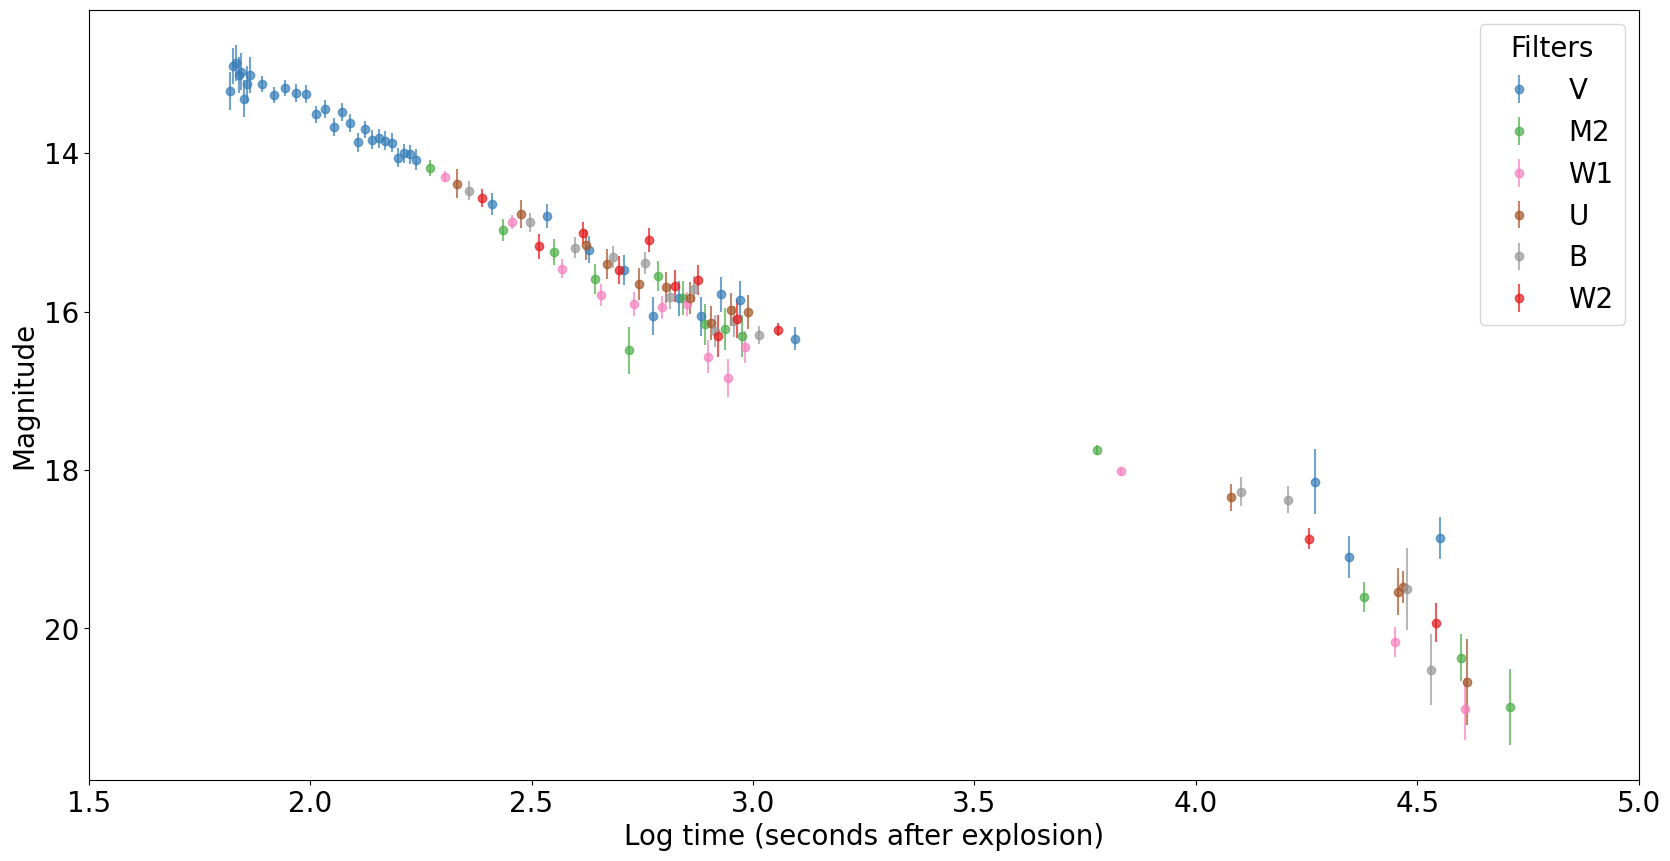

In [7]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(20,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties


#colour blind friendly colours to help visualization (courtesy of https://gist.github.com/thriveth/8560036, checked with sim daltonism)
colour = ['#377eb8', '#4daf4a',
                  '#f781bf', '#a65628',
                  '#999999', '#e41a1c']                         


for c,f in zip(colour, grbAG["filter"].unique()):           #zip lets me use the values of both
    
    pl.errorbar(grbAG.loc[grbAG["filter"] == f].logtime,   
             grbAG[grbAG["filter"] == f].mag, fmt='o', alpha=0.7,
             yerr=grbAG[grbAG["filter"] == f].magerr, label=f,
             ecolor = c, mec = c, mfc = c)
    

# invert the y axis and adjust axis
pl.xlim(1.5,5)
pl.gca().invert_yaxis()
pl.legend(title = "Filters")

pl.ylabel("Magnitude", fontsize=20)
pl.xlabel("Log time (seconds after explosion)", fontsize=20);

